### This notebook contains AOD(average) vs PM2.5 related data analysis (for 3KM, 3x3 grid)

In [7]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [8]:
#reading data
df = pd.read_csv("validcsv.csv")
# take a look at the dataset
df.head()

,filename,date,avgAOD,cpcbPM25,calcPM25
0,MYD04_3K.A2020062.0815.061.2020062195539.hdf,02-03-20,0.676,43.14,58.26276
1,MYD04_3K.A2020063.0720.061.2020063192715.hdf,03-03-20,1.002,66.14,65.92702
2,MYD04_3K.A2020064.0800.061.2020064194040.hdf,04-03-20,1.205,66.38,70.69955
3,MYD04_3K.A2020065.0845.061.2020070013550.hdf,05-03-20,0.809,71.02,61.38959
4,MYD04_3K.A2020068.0735.061.2020070140238.hdf,08-03-20,0.105,29.00,44.83855


In [9]:
# summarize the data
df.describe()

,avgAOD,cpcbPM25,calcPM25
count,20.000000,20.000000,20.000000
mean,0.544900,57.966500,55.180599
std,0.374602,18.116716,8.806885
min,0.105000,25.000000,44.838550
25%,0.291000,47.700000,49.211410
50%,0.399000,59.310000,51.750490
75%,0.731500,67.540000,59.567565
max,1.535000,86.930000,78.457850


In [10]:
#selecting necessary columns from the data set
cdf = df[['avgAOD','cpcbPM25','calcPM25']]
cdf.head(9)

,avgAOD,cpcbPM25,calcPM25
0,0.676,43.14,58.26276
1,1.002,66.14,65.92702
2,1.205,66.38,70.69955
3,0.809,71.02,61.38959
4,0.105,29.00,44.83855
5,0.724,61.73,59.39124
6,1.535,73.70,78.45785
7,0.165,54.65,46.24915
8,0.349,53.11,50.57499


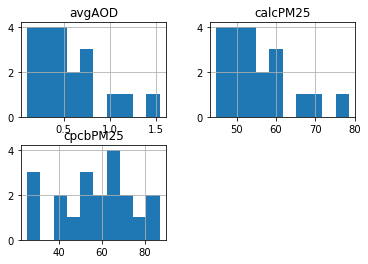

In [11]:
#visualizing the histogram of each column
viz = cdf[['avgAOD','cpcbPM25','calcPM25']]
viz.hist()
plt.show()

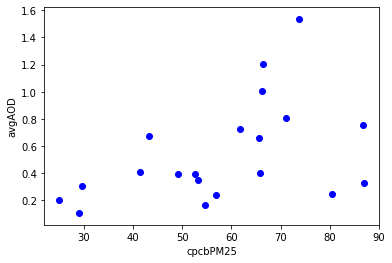

In [12]:
#scatter plot of CPCB-PM2.5 vs AOD(Average)
plt.scatter(cdf.cpcbPM25, cdf.avgAOD,  color='blue')
plt.xlabel("cpcbPM25")
plt.ylabel("avgAOD")
plt.show()

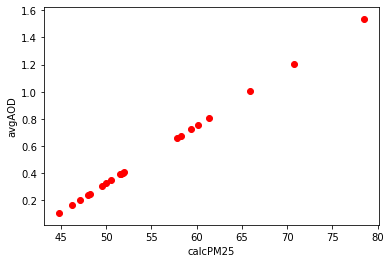

In [13]:
#scatter plot of calculated-PM2.5 vs AOD(Average)
plt.scatter(cdf.calcPM25, cdf.avgAOD,  color='red')
plt.xlabel("calcPM25")
plt.ylabel("avgAOD")
plt.show()

In [14]:
#creating training and testing dataset for Linear regression
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

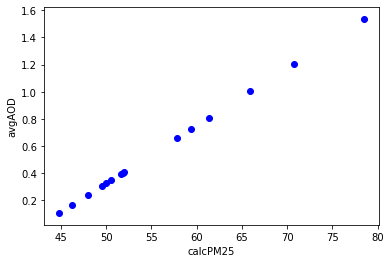

In [15]:
plt.scatter(train.calcPM25, train.avgAOD,  color='blue')
plt.xlabel("calcPM25")
plt.ylabel("avgAOD")
plt.show()

In [16]:
#Finding the coefficient and intercept
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['calcPM25']])
train_y = np.asanyarray(train[['avgAOD']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.04253509]]
Intercept:  [-1.80221182]


Text(0, 0.5, 'avgAOD')

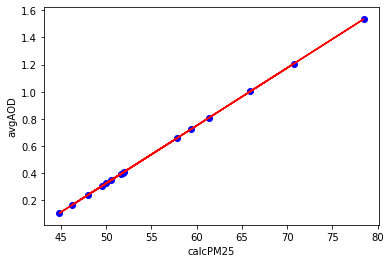

In [17]:
plt.scatter(train.calcPM25, train.avgAOD,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("calcPM25")
plt.ylabel("avgAOD")

In [18]:
#EVALUATION
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['calcPM25']])
test_y = np.asanyarray(test[['avgAOD']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00


## for CPCB-PM2.5 vs AOD (avg)

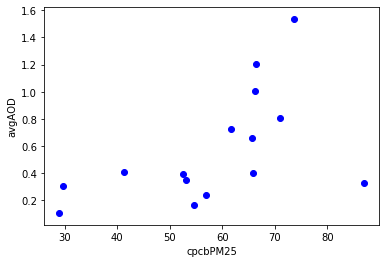

In [19]:
plt.scatter(train.cpcbPM25, train.avgAOD,  color='blue')
plt.xlabel("cpcbPM25")
plt.ylabel("avgAOD")
plt.show()

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['cpcbPM25']])
train_y = np.asanyarray(train[['avgAOD']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.01346252]]
Intercept:  [-0.2098575]


Text(0, 0.5, 'avgAOD')

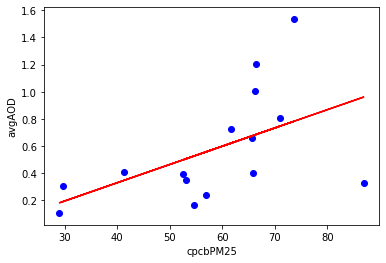

In [21]:
plt.scatter(train.cpcbPM25, train.avgAOD,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("cpcbPM25")
plt.ylabel("avgAOD")

In [22]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['cpcbPM25']])
test_y = np.asanyarray(test[['avgAOD']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.25
Residual sum of squares (MSE): 0.11
R2-score: -0.09
